# NFL Surface Comparison

With our data we'll be seeing if we can identify any differences on synthetic and natural surfaces that lead to a heightened chance of injury.



# The Data

In [1]:
# Loading in our data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

inj = pd.read_csv('../input/nfl-playing-surface-analytics/InjuryRecord.csv')
play = pd.read_csv('../input/nfl-playing-surface-analytics/PlayList.csv')
player = pd.read_csv('../input/nfl-playing-surface-analytics/PlayerTrackData.csv')

In [2]:
# Looking at our data

inj.head()

PlayerKey   GameID     PlayKey BodyPart    Surface  DM_M1  DM_M7  DM_M28  \
0      39873  39873-4  39873-4-32     Knee  Synthetic      1      1       1   
1      46074  46074-7  46074-7-26     Knee    Natural      1      1       0   
2      36557  36557-1  36557-1-70    Ankle  Synthetic      1      1       1   
3      46646  46646-3  46646-3-30    Ankle    Natural      1      0       0   
4      43532  43532-5  43532-5-69    Ankle  Synthetic      1      1       1   

   DM_M42  
0       1  
1       0  
2       1  
3       0  
4       1

In [3]:
play.head()

PlayerKey   GameID    PlayKey RosterPosition  PlayerDay  PlayerGame  \
0      26624  26624-1  26624-1-1    Quarterback          1           1   
1      26624  26624-1  26624-1-2    Quarterback          1           1   
2      26624  26624-1  26624-1-3    Quarterback          1           1   
3      26624  26624-1  26624-1-4    Quarterback          1           1   
4      26624  26624-1  26624-1-5    Quarterback          1           1   

  StadiumType  FieldType  Temperature         Weather PlayType  \
0     Outdoor  Synthetic           63  Clear and warm     Pass   
1     Outdoor  Synthetic           63  Clear and warm     Pass   
2     Outdoor  Synthetic           63  Clear and warm     Rush   
3     Outdoor  Synthetic           63  Clear and warm     Rush   
4     Outdoor  Synthetic           63  Clear and warm     Pass   

   PlayerGamePlay Position PositionGroup  
0               1       QB            QB  
1               2       QB            QB  
2               3       QB            QB  
3               4       QB            QB  
4               5       QB            QB

In [4]:
player.head()

PlayKey  time                 event      x      y     dir   dis       o  \
0  26624-1-1   0.0  huddle_start_offense  87.46  28.93  288.24  0.01  262.33   
1  26624-1-1   0.1                   NaN  87.45  28.92  283.91  0.01  261.69   
2  26624-1-1   0.2                   NaN  87.44  28.92  280.40  0.01  261.17   
3  26624-1-1   0.3                   NaN  87.44  28.92  278.79  0.01  260.66   
4  26624-1-1   0.4                   NaN  87.44  28.92  275.44  0.01  260.27   

      s  
0  0.13  
1  0.12  
2  0.12  
3  0.10  
4  0.09

# Data Cleaning

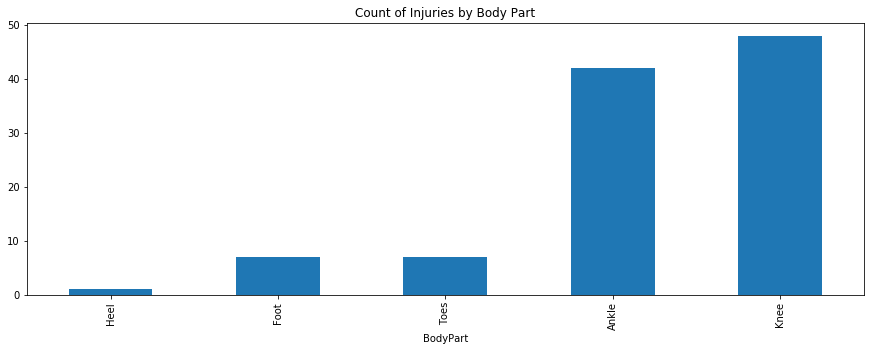

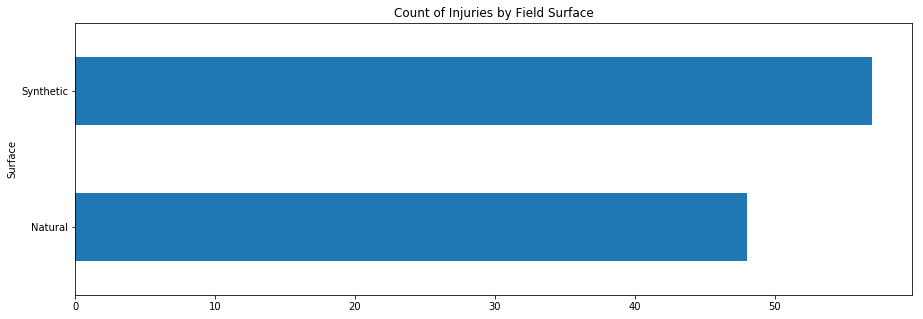

In [5]:
# Let's start with Injury Record data.

inj.groupby('BodyPart').count()['PlayerKey'] \
    .sort_values() \
    .plot(kind='bar', figsize=(15, 5), title='Count of Injuries by Body Part')
plt.show()

inj.groupby('Surface').count()['PlayerKey'] \
    .sort_values() \
    .plot(kind='barh', figsize=(15, 5), title='Count of Injuries by Field Surface')
plt.show()

Overall the Injury Record data looks pretty clean. Let's move along to the play list.

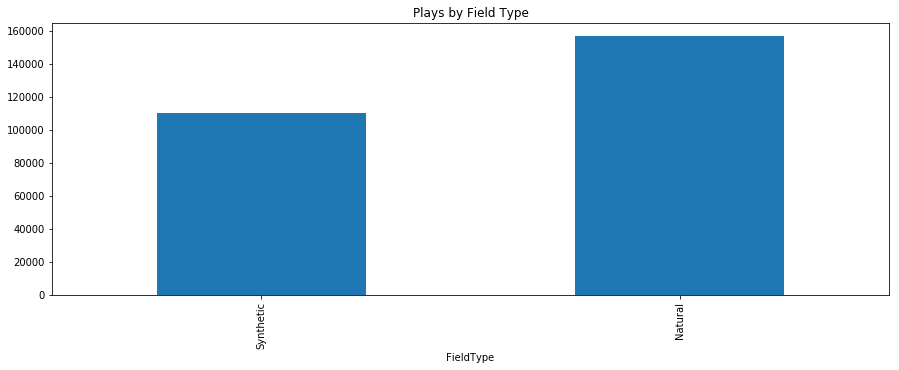

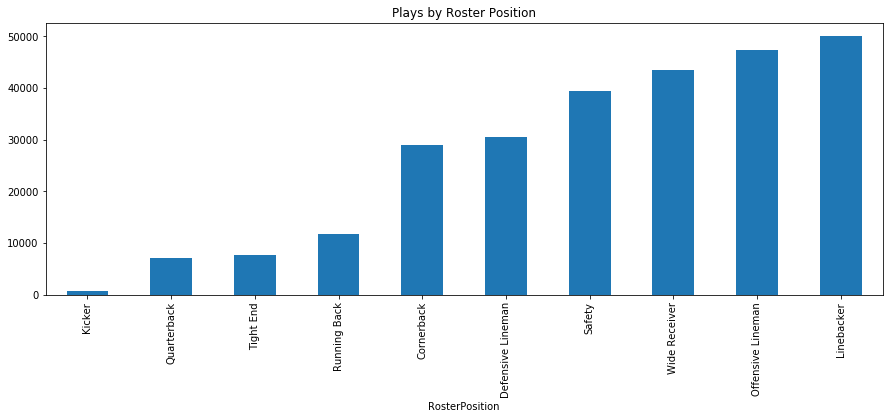

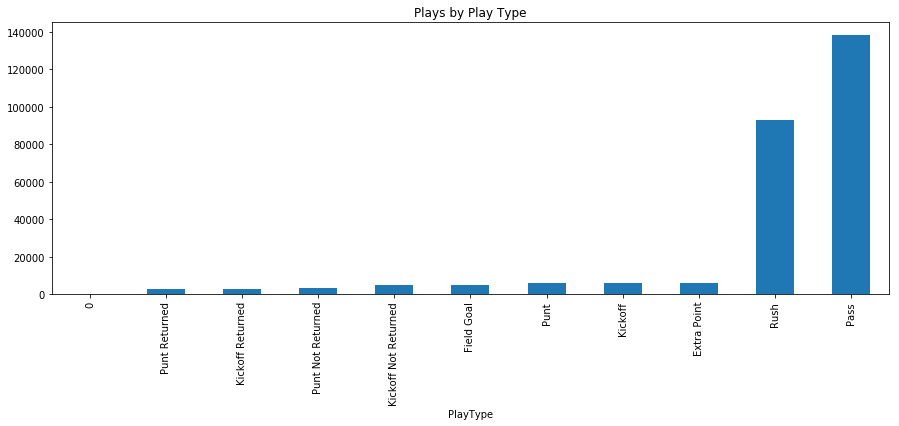

In [6]:
# Play List Data

play.groupby('FieldType').count()['PlayKey'] \
    .sort_values() \
    .plot(kind='bar', figsize=(15, 5), title = 'Plays by Field Type')
plt.show()

play.groupby('RosterPosition').count()['PlayKey'] \
    .sort_values() \
    .plot(kind='bar', figsize=(15, 5), title = 'Plays by Roster Position')
plt.show()

play.groupby('PlayType').count()['PlayKey'] \
    .sort_values() \
    .plot(kind='bar', figsize=(15, 5), title = 'Plays by Play Type')
plt.show()

*Interesting* - the amount of plays on natural fields is higher than synthetic, but we know that the amount of injuries on synthetic fields in our data is greater. We'll come back to that but let's continue exploring our data.

In [7]:
# First opportunity for cleaning. The Stadium Types have some misspellings and redundancies. Let's condense this to 4 values: outdoors, indoors, open, or closed.

play['StadiumType'].unique()

array(['Outdoor', 'Indoors', 'Oudoor', 'Outdoors', 'Open', 'Closed Dome',
       'Domed, closed', nan, 'Dome', 'Indoor', 'Domed',
       'Retr. Roof-Closed', 'Outdoor Retr Roof-Open', 'Retractable Roof',
       'Ourdoor', 'Indoor, Roof Closed', 'Retr. Roof - Closed', 'Bowl',
       'Outddors', 'Retr. Roof-Open', 'Dome, closed', 'Indoor, Open Roof',
       'Domed, Open', 'Domed, open', 'Heinz Field', 'Cloudy',
       'Retr. Roof - Open', 'Retr. Roof Closed', 'Outdor', 'Outside'],
      dtype=object)

In [8]:
array_outdoors = ['Outdoor', 'Oudoor', 'Outdoors',
       'Ourdoor', 'Outddors', 'Heinz Field', 'Outdor', 'Outside', 'Cloudy']
array_indoors = ['Indoors', 'Indoor', 'Indoor', 'Retractable Roof']
array_open = ['Open','Outdoor Retr Roof-Open', 'Retr. Roof-Open', 'Indoor, Open Roof',
       'Domed, Open', 'Domed, open', 'Retr. Roof - Open']
array_closed = ['Closed Dome', 'Domed, closed', 'Dome', 'Domed',
       'Retr. Roof-Closed', 'Outdoor Retr Roof-Open', 'Retractable Roof', 'Indoor, Roof Closed', 'Retr. Roof - Closed', 'Bowl', 'Dome, closed',
       'Retr. Roof Closed']

play['StadiumType'] = play['StadiumType'].replace(array_outdoors, 'Outdoors')
play['StadiumType'] = play['StadiumType'].replace(array_indoors, 'Indoors')
play['StadiumType'] = play['StadiumType'].replace(array_open, 'Open')
play['StadiumType'] = play['StadiumType'].replace(array_closed, 'Closed')

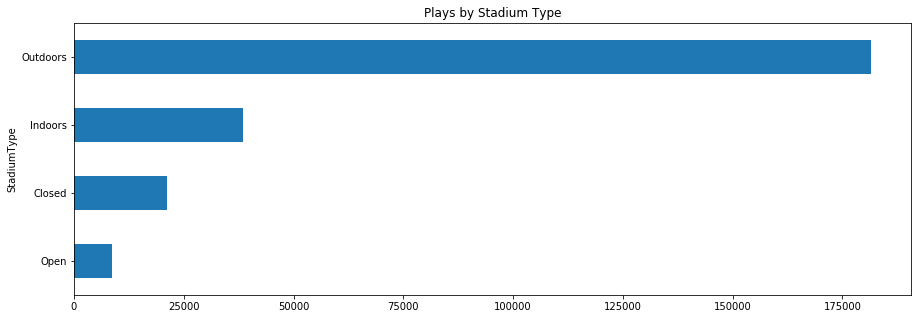

In [9]:
# That's better.

play.groupby('StadiumType').count()['PlayKey'] \
    .sort_values() \
    .plot(kind='barh', figsize=(15, 5), title= 'Plays by Stadium Type')
plt.show()

In [10]:
# Weather is another one that can use some work. We'll condense this to clear, cloudy, indoors, and precipitation.

play['Weather'].unique()

array(['Clear and warm', 'Mostly Cloudy', 'Sunny', 'Clear', 'Cloudy',
       'Cloudy, fog started developing in 2nd quarter', 'Rain',
       'Partly Cloudy', 'Mostly cloudy', 'Cloudy and cold',
       'Cloudy and Cool', 'Rain Chance 40%', 'Controlled Climate',
       'Sunny and warm', 'Partly cloudy', 'Clear and Cool',
       'Clear and cold', 'Sunny and cold', 'Indoor', nan, 'Partly Sunny',
       'N/A (Indoors)', 'Mostly Sunny', 'Indoors', 'Clear Skies',
       'Partly sunny', 'Showers', 'N/A Indoor', 'Sunny and clear', 'Snow',
       'Scattered Showers', 'Party Cloudy', 'Clear skies',
       'Rain likely, temps in low 40s.', 'Hazy', 'Partly Clouidy',
       'Sunny Skies', 'Overcast', 'Cloudy, 50% change of rain', 'Fair',
       'Light Rain', 'Partly clear', 'Mostly Coudy', '10% Chance of Rain',
       'Cloudy, chance of rain', 'Heat Index 95',
       'Sunny, highs to upper 80s', 'Sun & clouds',
       'Heavy lake effect snow', 'Mostly sunny', 'Cloudy, Rain',
       'Sunny, Windy', '

In [11]:
array_clear = ['Clear and warm', 'Sunny', 'Clear',
       'Sunny and warm', 'Clear and Cool',
       'Clear and cold', 'Sunny and cold', 'Partly Sunny',
       'Mostly Sunny', 'Clear Skies', 'Partly sunny', 
       'Sunny and clear', 'Clear skies',
       'Sunny Skies', 'Fair', 'Partly clear', 
       'Heat Index 95', 'Sunny, highs to upper 80s', 
       'Mostly sunny', 'Sunny, Windy', 'Mostly Sunny Skies', 
       'Clear and Sunny', 'Clear and sunny',
       'Clear to Partly Cloudy', 'Cold']

array_cloudy = ['Mostly Cloudy', 'Cloudy',
       'Cloudy, fog started developing in 2nd quarter',
       'Partly Cloudy', 'Mostly cloudy', 'Cloudy and cold',
       'Cloudy and Cool', 'Partly cloudy', 
       'Party Cloudy', 'Hazy', 'Partly Clouidy',
       'Overcast', 'Cloudy, 50% change of rain',
       'Mostly Coudy', 'Cloudy, chance of rain',
       'Sun & clouds', 'Cloudy, Rain',
       'cloudy', 'Coudy']

array_indoors = ['Controlled Climate','Indoor',
       'N/A (Indoors)', 'Indoors', 'N/A Indoor']

array_precip = ['Rain',
       'Snow',
       'Scattered Showers',
       'Light Rain',
       'Heavy lake effect snow', 'Cloudy, Rain',
       'Rainy',
       'Cloudy, light snow accumulating 1-3"',
       'Cloudy with periods of rain, thunder possible. Winds shifting to WNW, 10-20 mph.',
       'Rain shower', 'Rain likely, temps in low 40s.', 'Rain Chance 40%', 'Rain likely, temps in low 40s.',
       'Cloudy, 50% change of rain', '10% Chance of Rain', 'Showers', '30% Chance of Rain']

play['Weather'] = play['Weather'].replace(array_clear, 'Clear')
play['Weather'] = play['Weather'].replace(array_cloudy, 'Cloudy')
play['Weather'] = play['Weather'].replace(array_indoors, 'Indoors')
play['Weather'] = play['Weather'].replace(array_precip, 'Precipitation')

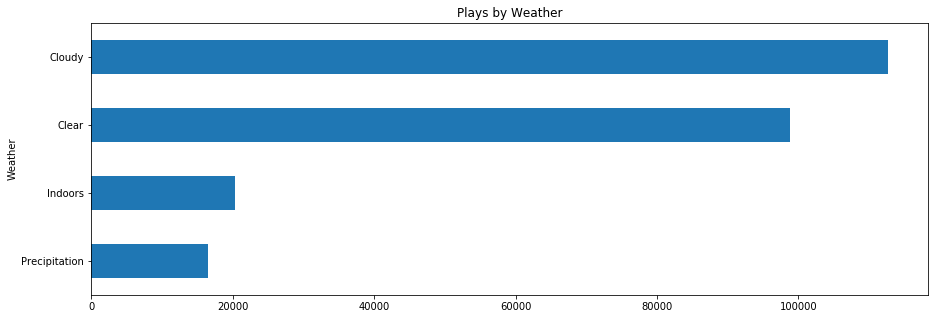

In [12]:
# Now we have 4 categories to ease our analyses.

play.groupby('Weather').count()['PlayKey'] \
    .sort_values() \
    .plot(kind='barh', figsize=(15, 5), title= 'Plays by Weather')
plt.show()

# Analysis

Now let's do some deeper digging.

In [13]:
# Creating a merged table to be able to analyze injury plays deeper. Since some injury records are missing a Play Key, only 77 of these records will remain

merge = pd.merge(inj, play)

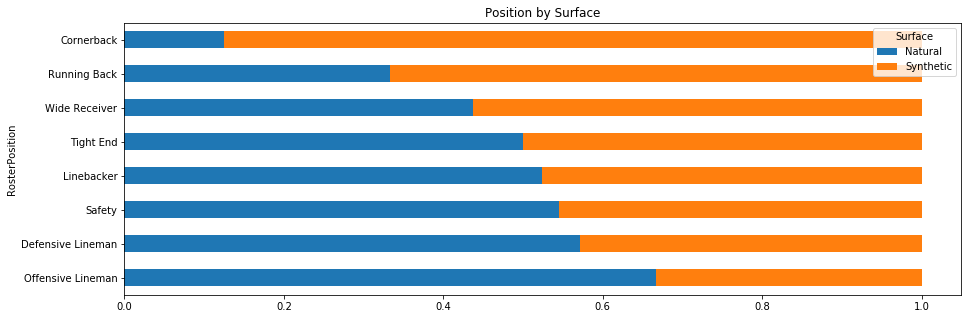

In [14]:
merge.groupby(['RosterPosition','Surface']) \
    .count() \
    .unstack('Surface')['PlayKey'] \
    .T.apply(lambda x: x / x.sum()) \
    .sort_values('Surface').T.sort_values('Synthetic', ascending=True) \
    .plot(kind='barh',
          figsize=(15, 5),
          title='Position by Surface',
          stacked=True)
plt.show()

Cornerback has the largest percentage of synthetic injuries. We'll take a deeper look at this later on.

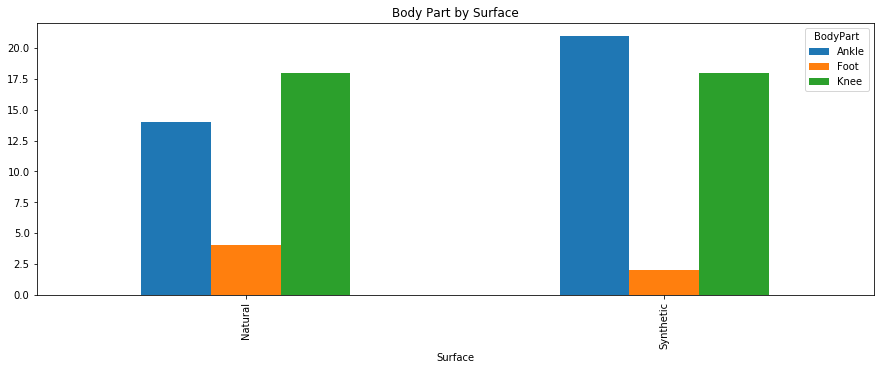

In [15]:
# Injury analysis by body part.

merge.groupby(['BodyPart','Surface']) \
    .count() \
    .unstack('BodyPart')['PlayKey'] \
    .plot(kind='bar', figsize=(15, 5), title='Body Part by Surface')
plt.show()

Ankles take a significant increase with Synthetic surfaces.

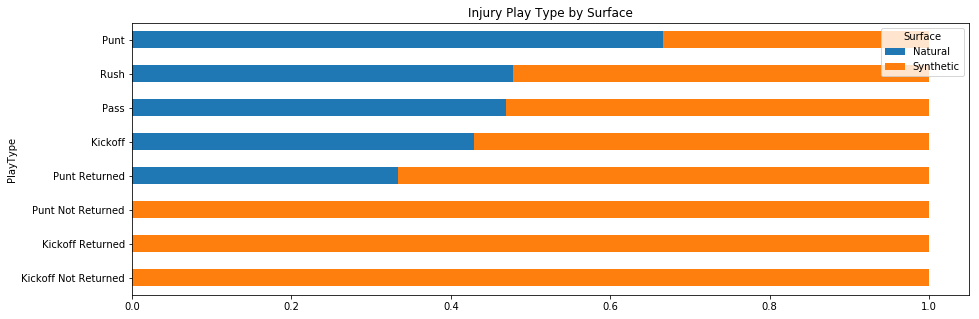

In [16]:
merge.groupby(['PlayType','Surface']) \
    .count() \
    .unstack('Surface')['PlayKey'] \
    .T.apply(lambda x: x / x.sum()) \
    .sort_values('Surface').T.sort_values('Synthetic', ascending=False) \
    .plot(kind='barh',
          figsize=(15, 5),
          title='Injury Play Type by Surface',
          stacked=True)
plt.show()

In [17]:
# Isolating our pass & rush plays, which is the majority of our data.

is_pass = merge['PlayType']=='Pass'

is_rush = merge['PlayType']=='Rush'

passmerge = merge[is_pass]

rushmerge = merge[is_rush]

passrush = pd.merge(passmerge, rushmerge, how='outer')

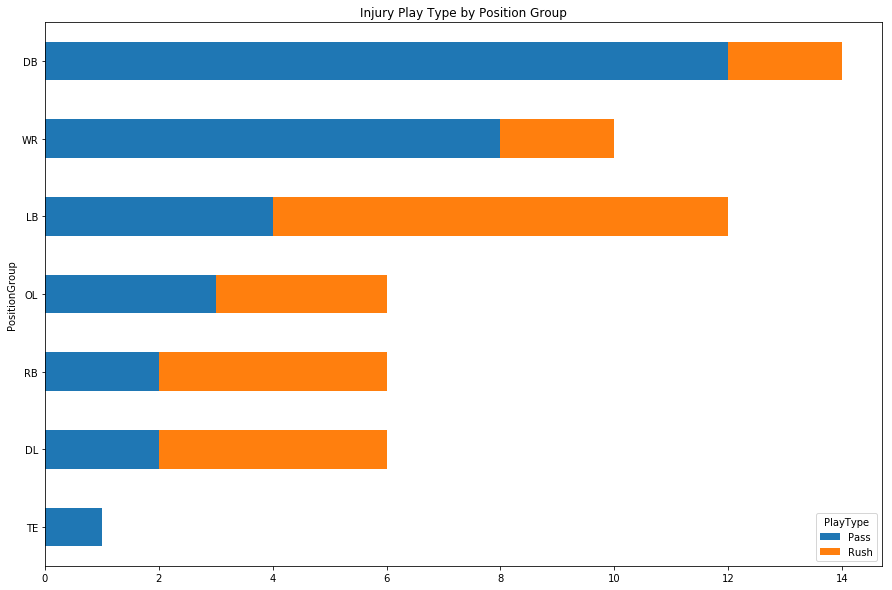

In [18]:
passrush.groupby(['PlayType','PositionGroup']) \
    .count() \
    .unstack('PositionGroup')['PlayKey'] \
    .sort_values('PlayType').T.sort_values('Pass', ascending=True) \
    .plot(kind='barh',
          figsize=(15, 10),
          title='Injury Play Type by Position Group',
          stacked=True)
plt.show()

Position clearly plays a large role in the Play Type on injuries. Positions like DB & WR will have more injuries on pass plays, which is excpected and RB's will have more on Rush plays. LB and DL will also have more injuries on rushes while OL is pretty split.

# Weather & Temperature

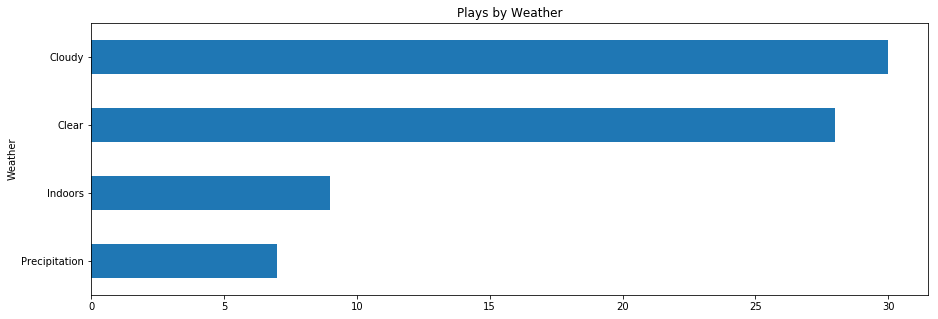

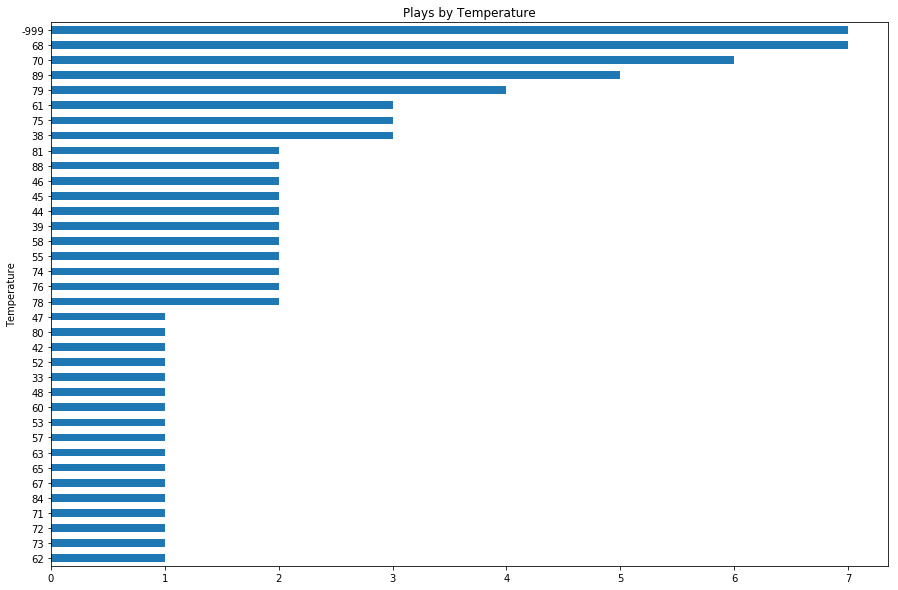

In [19]:
merge.groupby('Weather').count()['PlayKey'] \
    .sort_values() \
    .plot(kind='barh', figsize=(15, 5), title= 'Plays by Weather')
plt.show()

merge.groupby('Temperature').count()['PlayKey'] \
    .sort_values() \
    .plot(kind='barh', figsize=(15, 10), title= 'Plays by Temperature')
plt.show()

Weather and temperature don't appear to have any significant effect as these match up with the number of total plays for each condition we viewed earlier.

# Cornerback Drilldown:

In [20]:
# We're working with a pretty small sample of CB injuries here, but we'll go ahead and explore some.


is_cb = merge['RosterPosition']=='Cornerback'

cbmerge = merge[is_cb]

cbmerge['PlayKey'].nunique()

7

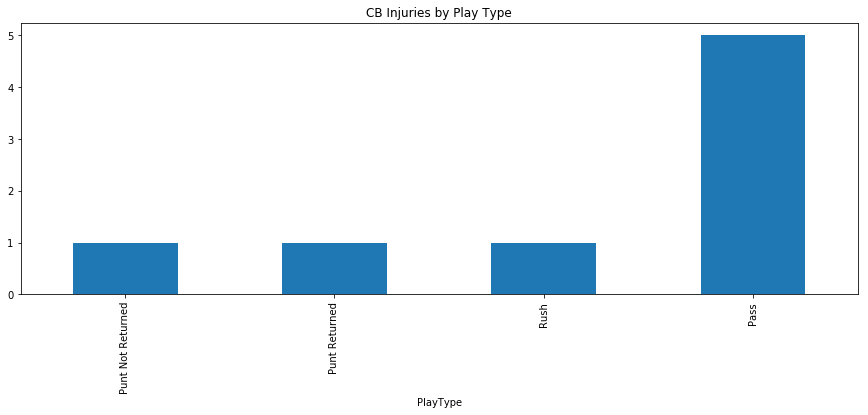

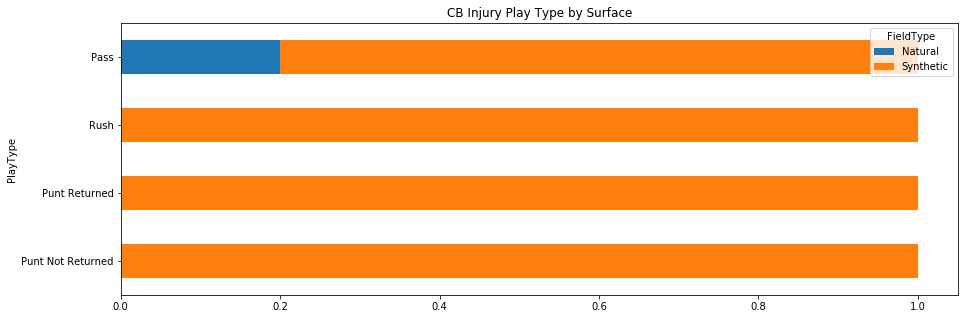

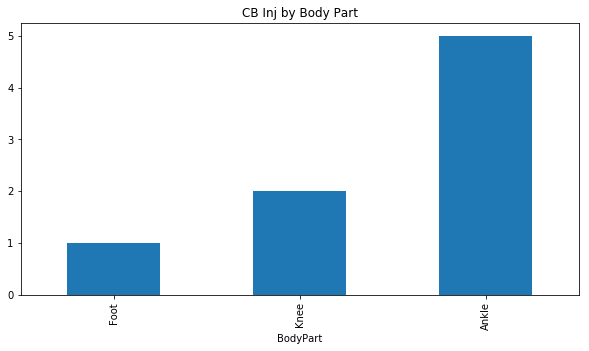

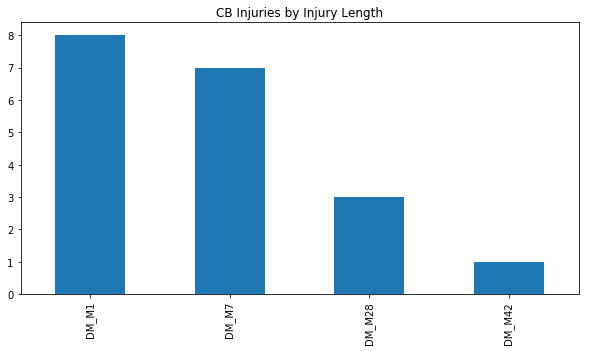

In [21]:
cbmerge.groupby('PlayType').count()['PlayKey'] \
    .sort_values() \
    .plot(kind='bar', figsize=(15, 5), title= 'CB Injuries by Play Type')
plt.show()

cbmerge.groupby(['PlayType','FieldType']) \
    .count() \
    .unstack('FieldType')['PlayKey'] \
    .T.apply(lambda x: x / x.sum()) \
    .sort_values('FieldType').T.sort_values('Synthetic', ascending=False) \
    .plot(kind='barh',
          figsize=(15, 5),
          title='CB Injury Play Type by Surface',
          stacked=True)
plt.show()

cbmerge.groupby('BodyPart').count()['PlayKey'] \
    .sort_values() \
    .plot(kind='bar', figsize=(10, 5), title= 'CB Inj by Body Part')
plt.show()

cbmerge[['DM_M1','DM_M7','DM_M28','DM_M42']].sum() \
    .plot(figsize=(10, 5),
          kind='bar',
          title='CB Injuries by Injury Length')
plt.show()

From the data we've been given, CB's are mainly having ankle injuries on pass plays. The majority put them out for a week.

# Distribution of Player Speed & Distance

Now we'll take a look at the distribution of speed / velocity based on the data we were given in the Player Track csv.

In [22]:
# Merging tables to gain s and dis on our injury plays.

inj_detail = pd.merge(inj, player)

inj_detail_syn = inj_detail['Surface']=='Synthetic'
injsynthviolin = inj_detail[inj_detail_syn]

inj_detail_nat = inj_detail['Surface']=='Natural'
injnatviolin = inj_detail[inj_detail_nat]

In [23]:
# Creating groups for synthetic and natural field types by max speed.

inj_s_syn = injsynthviolin.groupby('PlayKey', as_index=False)['s'].max()
inj_s_nat = injnatviolin.groupby('PlayKey', as_index=False)['s'].max()

In [24]:
fig = px.violin(inj_s_nat, y='s', box=True,
                points='all', title='Distribution of Max Speed - Natural'
               )
fig.show()

fig = px.violin(inj_s_syn, y='s', box=True,
                points='all', title='Distribution of Max Speed - Synthetic'
               )
fig.show()

Our distributions appear pretty similar - we can see a higher distribution as the max speed on the play rises in both.

In [25]:
# Creating groups for synthetic and natural field types by max distance.

inj_dis_syn = injsynthviolin.groupby('PlayKey', as_index=False)['dis'].max()
inj_dis_nat = injnatviolin.groupby('PlayKey', as_index=False)['dis'].max()

In [26]:
fig = px.violin(inj_dis_nat, y='dis', box=True,
                points='all', title='Distribution of Max Distance - Natural'
               )
fig.show()

fig = px.violin(inj_dis_syn, y='dis', box=True,
                points='all', title='Distribution of Max Distance - Synthetic'
               )
fig.show()

Our distribution for distance looks similar as well, there is a bump in the mid to higher distances traveled for both.

# Plotting the Plays:

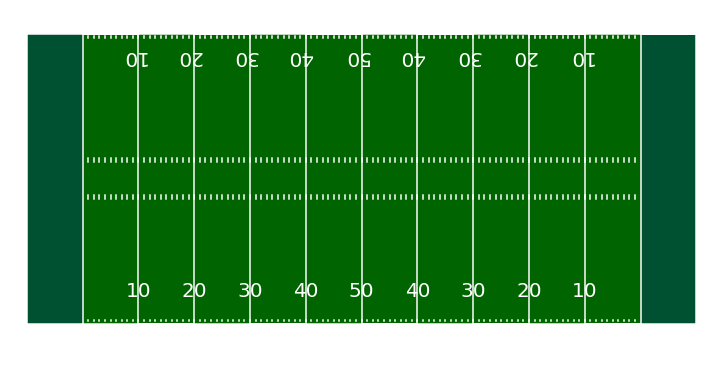

In [27]:
def create_football_field(linenumbers=True,
                          endzones=True,
                          highlight_line=False,
                          highlight_line_number=50,
                          highlighted_name='Line of Scrimmage',
                          fifty_is_los=False,
                          figsize=(12, 6.33)):
 
    rect = patches.Rectangle((0, 0), 120, 53.3, linewidth=0.1,
                             edgecolor='r', facecolor='darkgreen', zorder=0)

    fig, ax = plt.subplots(1, figsize=figsize)
    ax.add_patch(rect)

    plt.plot([10, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
              80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
             [0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3,
              53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
             color='white')
    if fifty_is_los:
        plt.plot([60, 60], [0, 53.3], color='gold')
        plt.text(62, 50, '<- Player Yardline at Snap', color='gold')
    # Endzones
    if endzones:
        ez1 = patches.Rectangle((0, 0), 10, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ez2 = patches.Rectangle((110, 0), 120, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ax.add_patch(ez1)
        ax.add_patch(ez2)
    plt.xlim(0, 120)
    plt.ylim(-5, 58.3)
    plt.axis('off')
    if linenumbers:
        for x in range(20, 110, 10):
            numb = x
            if x > 50:
                numb = 120 - x
            plt.text(x, 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white')
            plt.text(x - 0.95, 53.3 - 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white', rotation=180)
    if endzones:
        hash_range = range(11, 110)
    else:
        hash_range = range(1, 120)

    for x in hash_range:
        ax.plot([x, x], [0.4, 0.7], color='white')
        ax.plot([x, x], [53.0, 52.5], color='white')
        ax.plot([x, x], [22.91, 23.57], color='white')
        ax.plot([x, x], [29.73, 30.39], color='white')

    if highlight_line:
        hl = highlight_line_number + 10
        plt.plot([hl, hl], [0, 53.3], color='yellow')
        plt.text(hl + 2, 50, '<- {}'.format(highlighted_name),
                 color='yellow')
    return fig, ax

create_football_field()
plt.show()

In [28]:
# To start off we'll use an exmaple from our CB data.

cbmerge.head(1)

PlayerKey   GameID     PlayKey BodyPart    Surface  DM_M1  DM_M7  DM_M28  \
26      43518  43518-6  43518-6-25    Ankle  Synthetic      1      1       1   

    DM_M42 RosterPosition  PlayerDay  PlayerGame StadiumType  FieldType  \
26       1     Cornerback         36           6     Indoors  Synthetic   

    Temperature  Weather PlayType  PlayerGamePlay Position PositionGroup  
26         -999  Indoors     Pass              25       CB            DB

In [29]:
example_play = player['PlayKey']=='43518-6-25'

example = player[example_play]

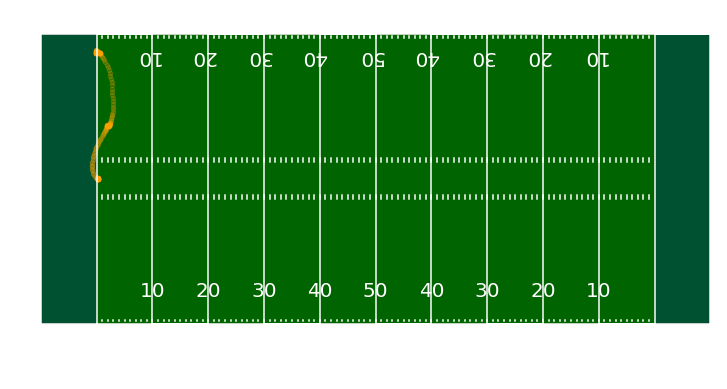

In [30]:
# Plotting our first play

fig, ax = create_football_field()
example.groupby('PlayKey'), example.plot(kind='scatter', x='x', y='y', ax=ax, color='orange', alpha=0.2)
plt.show()

In [31]:
# Breaking our injuries apart by synthetic and natural fields.

inj_syn = passrush['Surface']=='Synthetic'
injsynthetic = passrush[inj_syn]
inj_nat = passrush['Surface']=='Natural'
injnatural = passrush[inj_nat]

synplot = pd.merge(injsynthetic, player)
natplot = pd.merge(injnatural, player)

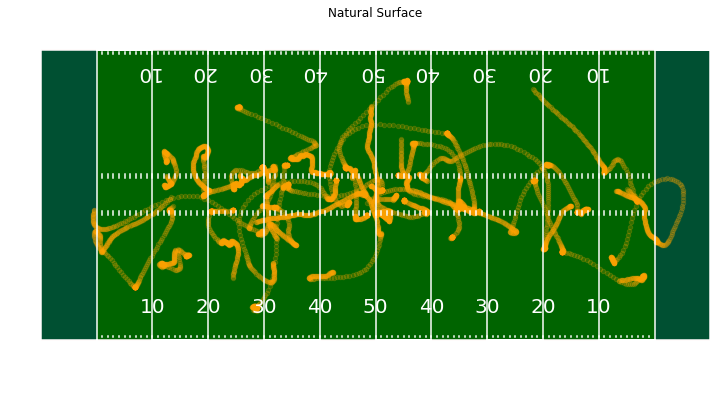

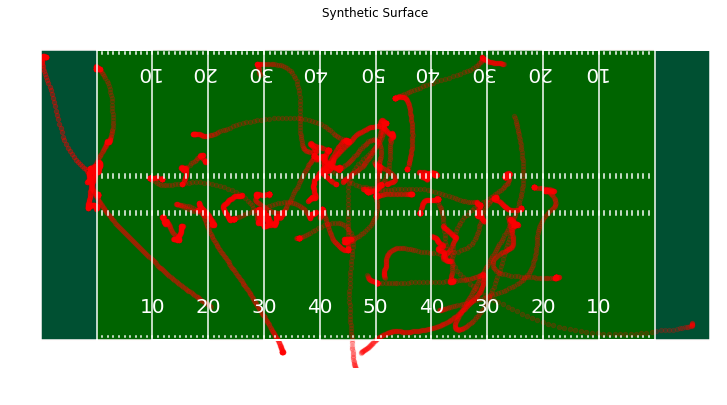

In [32]:
fig, ax = create_football_field()
natplot.groupby('PlayKey'), natplot.plot(kind='scatter', x='x', y='y', ax=ax, color='orange', alpha=0.2, title='Natural Surface')
plt.show()

fig, ax = create_football_field()
synplot.groupby('PlayKey'), synplot.plot(kind='scatter', x='x', y='y', ax=ax, color='red', alpha=0.2, title='Synthetic Surface')
plt.show()

There seems to be a difference in where these plays end. Injuries on Natural surfaces seemed to start and end in the middle of the field and injuries on Synthetic surfaces seemed to end more in the end zones, out of bounds, or along the side lines. This seems to possibly indicate that more non-contact injuries are occuring on synthetic surfaces, as these plays are not ending due to being tackled as much as on Natural surfaces.

# Conclusion

From our findings, we are able to identify some differences in the injuries we were provided based on the field surfaces. Some of these findings include the following:

- Total injury rate on Synthetic surfaces is higher in the data we were provided.
- Lower limb injuries are more common on Synthetic surfaces.
- Skill positions and DB's have more injuries on Synthetic surfaces.
- There appears to be a higher concentration of injuries as speed and distance increase.
- Non-contact injuries appear to be the result of more injuries on Synthetic surfaces judging from our play plots on the field.